### $\tau$ resolved results

In [383]:
import pimc
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
import importlib
importlib.reload(pimc)

<module 'pimc' from '/Users/ecasiano/Desktop/LatticePIMC/pimc.py'>

In [384]:
%%time
# To store raw data
K_raw={}
V_raw={}
E_raw={}

N_raw={}

# To store equilibrated data
K = {}
V = {}
E = {}

CPU times: user 15 µs, sys: 6 µs, total: 21 µs
Wall time: 22.9 µs


In [385]:
!ls

3_9_1.0000_-3.4000_1.0000_2.0000_10000000_17_2D_gc_K.dat
3_9_1.0000_-3.4000_1.0000_2.0000_10000000_17_2D_gc_N.dat
3_9_1.0000_-3.4000_1.0000_2.0000_10000000_17_2D_gc_V.dat
4_1.0000_-1.4000_2.0000_1000000000_Nhist.pdf
4_1.0000_-1.4000_2.0000_100000000_Nhist.pdf
4_1.0000_-1.4000_2.0000_15000000_Nhist.pdf
4_4_1.0000_-1.2237_1.0000_2.0000_100000000_17_1D_can_K.dat
4_4_1.0000_-1.2237_1.0000_2.0000_100000000_17_1D_can_N.dat
4_4_1.0000_-1.2237_1.0000_2.0000_100000000_17_1D_can_V.dat
4_4_1.0000_-1.2237_1.0000_2.0000_1000000_17_1D_can_K.dat
4_4_1.0000_-1.2237_1.0000_2.0000_1000000_17_1D_can_N.dat
4_4_1.0000_-1.2237_1.0000_2.0000_1000000_17_1D_can_V.dat
4_4_1.0000_-1.2237_1.0000_2.0000_4000000_17_1D_can_K.dat
4_4_1.0000_-1.2237_1.0000_2.0000_4000000_17_1D_can_N.dat
4_4_1.0000_-1.2237_1.0000_2.0000_4000000_17_1D_can_V.dat
4_4_1.0000_-1.4000_1.0000_2.0000_1000000000_17_1D_gc_K.dat
4_4_1.0000_-1.4000_1.0000_2.0000_1000000000_17_1D_gc_N.dat
4_4_1.0000_-1.4000_1.0000_2.0000_1000000000_17_1D_gc_V.dat
4

In [386]:
%%time
# 3X3
K_raw['beta=1'] = np.loadtxt("4_4_1.0000_-1.2237_1.0000_2.0000_4000000_17_1D_can_K.dat")
V_raw['beta=1'] = np.loadtxt("4_4_1.0000_-1.2237_1.0000_2.0000_4000000_17_1D_can_V.dat")-1.2237*4
#N_raw['beta=1'] = np.loadtxt("3_9_1.0000_-3.9000_1.0000_2.0000_1000000_17_2D_gc_N.dat")

# K_raw['beta=1'] = np.loadtxt("3_9_10.0000_4.9950_1.0000_2.0000_20000000_17_2D_canK.dat")
# V_raw['beta=1'] = np.loadtxt("3_9_10.0000_4.9950_1.0000_2.0000_20000000_17_2D_canV.dat")+4.9950*9

CPU times: user 104 ms, sys: 4.99 ms, total: 109 ms
Wall time: 109 ms


In [387]:
Klen = len(K_raw['beta=1'])
Vlen = len(V_raw['beta=1'])
if Klen > Vlen: length = Vlen
else: length = Klen
print(len(K_raw['beta=1']))
print(len(V_raw['beta=1']))
#print(len(N_raw['beta=1']))

2504
2504


In [388]:
# Throw away data because of equilibration
beta_list = [1,3,5]
beta_list = [1]

for i,beta in enumerate(beta_list):
    
    label = f'beta={beta}'
    
    samples = len(K_raw[label])

    # Throw away presumably inequilibrated data
    K[label] = K_raw[label][int(samples*0.01):length]
    V[label] = V_raw[label][int(samples*0.01):length]
    E[label] = K[label][:]+V[label][:]

In [389]:
# Get mean and standard error as measured from various tau slices
K_mean = {}
V_mean = {}
E_mean = {}

K_err_bin_levels = []
V_err_bin_levels = []
E_err_bin_levels = []

K_err = {}
V_err = {}
E_err = {}

for beta in beta_list:
    
    label = f'beta={beta}'

    samples = len(K[label])
    
    K_mean[label] = np.mean(K[label],axis=0)
    V_mean[label] = np.mean(V[label],axis=0)
    E_mean[label]= np.mean(E[label],axis=0)
    
    # STD Err via Binning Analysis (<K>)
    max_bin_level = int(np.log2(len(K[label])))
    min_bin = 40
    binned_data = np.copy(K[label])
    for i in range(max_bin_level):
        print(len(binned_data))
        K_err_bin_levels.append(sem(binned_data,axis=0,ddof=1))
        if len(binned_data)/2 <= min_bin: 
              break
        else:
              binned_data = pimc.get_binned_data(binned_data)
    K_err_bin_levels = np.array(K_err_bin_levels) # This allows for tuple indices
    
    # STD Err via Binning Analysis (<V>)
    max_bin_level = int(np.log2(len(V[label])))
    min_bin = 40
    binned_data = np.copy(V[label])
    for i in range(max_bin_level):
        V_err_bin_levels.append(sem(binned_data,axis=0,ddof=1))
        if len(binned_data)/2 <= min_bin: 
              break
        else:
              binned_data = pimc.get_binned_data(binned_data)
    V_err_bin_levels = np.array(V_err_bin_levels) # This allows for tuple indices
    
    # STD Err via Binning Analysis (<V>)
    max_bin_level = int(np.log2(len(E[label])))
    min_bin = 40
    binned_data = np.copy(E[label])
    for i in range(max_bin_level):
        E_err_bin_levels.append(sem(binned_data,axis=0,ddof=1))
        if len(binned_data)/2 <= min_bin: 
              break
        else:
              binned_data = pimc.get_binned_data(binned_data)
    E_err_bin_levels = np.array(E_err_bin_levels) # This allows for tuple indices

# From all bin levels, choose the highest std error. Use this for errorbars.
K_err[label] = np.max(K_err_bin_levels,axis=0)
V_err[label] = np.max(V_err_bin_levels,axis=0)
E_err[label] = np.max(E_err_bin_levels,axis=0)

2479
1239
619
309
154
77


In [390]:
# Generate the tau slices (actually fractions of beta)
n_slices=23
beta=1
tau_slices = np.linspace(0,beta,n_slices)[1:-1][::2]

len(tau_slices)
half_idx = int(len(tau_slices)/2)
tau_slices[half_idx]
half_idx

5

0.42871674855764696


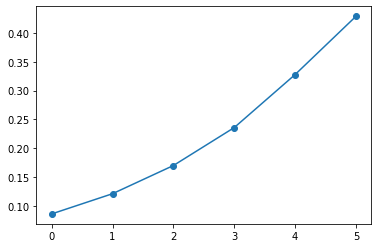

In [391]:
plt.plot(K_err_bin_levels[:,half_idx],marker='o')
print(K_err[label][half_idx])

0.06905794205941845


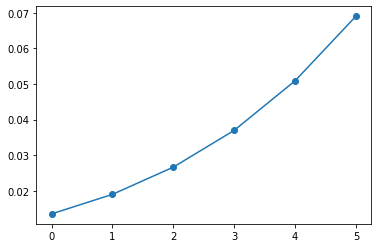

In [392]:
plt.plot(V_err_bin_levels[:,half_idx],marker='o')
print(V_err[label][half_idx])

Ground state kinetic energy: -7.7344 +/- 0.4287


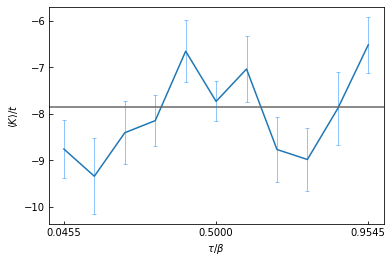

In [393]:
# Plot kinetic energy as function of tau slices
fig, ax1 = plt.subplots()
i = 1
label = f'beta={i}'
ax1.plot(tau_slices,K_mean[label],'-',label='beta=4')
ax1.errorbar(tau_slices,K_mean[label],marker='o',mec='dodgerblue',
                            mfc='lightskyblue',mew=0.5,alpha=1,
                            yerr=K_err[label],fmt='o',
                            ecolor='dodgerblue',zorder=1,capsize=2,
                            ms=0,elinewidth=0.5)
#ax1.axhline(-35.715378606015335,color='#666666') #3D
ax1.axhline(-7.854909432535828,color='#666666') #3D
ax1.set_xticks(np.linspace(0,beta,n_slices)[1:-1][::10])
ax1.set_ylabel(r'$\langle K \rangle /t$')
ax1.set_xlabel(r'$\tau/\beta$')
ax1.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
#plt.savefig('K_tau_frac.pdf')
#plt.legend()
print("Ground state kinetic energy: %.4f +/- %.4f"%(K_mean[label][half_idx],K_err[label][half_idx]))

Ground state diagonal energy: 1.2122 +/- 0.0691


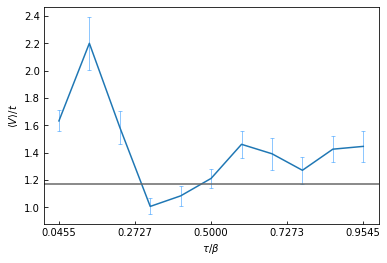

In [394]:
# Plot diagonal energy as function of tau slices
fig, ax2 = plt.subplots()
ax2.plot(tau_slices,V_mean[label],'-',label='beta=4')
ax2.errorbar(tau_slices,V_mean[label],marker='o',mec='dodgerblue',
                            mfc='lightskyblue',mew=0.5,alpha=1,
                            yerr=V_err[label],fmt='o',
                            ecolor='dodgerblue',zorder=1,capsize=2,
                            ms=0,elinewidth=0.5)
#ax2.axhline(3.3650282801015536,color='#666666')
ax2.axhline(1.1731759348945732,color='#666666')
ax2.set_ylabel(r'$\langle V \rangle /t$')
ax2.set_xlabel(r'$\tau/\beta$')
ax2.set_xticks(np.linspace(0,beta,n_slices)[1:-1][::5])
ax2.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
plt.savefig('U_tau_frac_C1_COEFF.pdf')
#plt.legend()
print("Ground state diagonal energy: %.4f +/- %.4f"%(V_mean[label][half_idx],V_err[label][half_idx]))

Ground state energy: -6.5222 +/- 0.4346


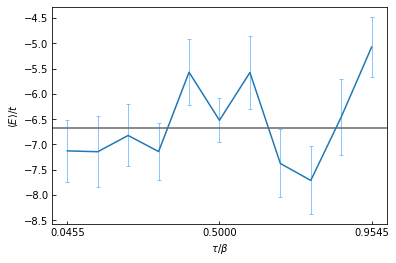

In [395]:
# Plot total energy as function of tau slices
fig, ax3 = plt.subplots()
ax3.plot(tau_slices,E_mean[label],'-',label='beta=4')
ax3.errorbar(tau_slices,E_mean[label],marker='o',mec='dodgerblue',
                            mfc='lightskyblue',mew=0.5,alpha=1,
                            yerr=E_err[label],fmt='o',
                            ecolor='dodgerblue',zorder=1,capsize=2,
                            ms=0,elinewidth=0.5)
#ax3.axhline(-32.35035032591378,color='#666666')
ax3.axhline(-6.681733497641255,color='#666666')
ax3.set_ylabel(r'$\langle E \rangle /t$')
ax3.set_xlabel(r'$\tau/\beta$')
ax3.set_xticks(np.linspace(0,beta,n_slices)[1:-1][::10])
ax3.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
#plt.legend()
plt.savefig("E.pdf")
print("Ground state energy: %.4f +/- %.4f"%(E_mean[label][half_idx],E_err[label][half_idx]))

0.4340584982623173


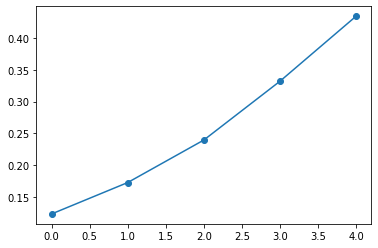

In [372]:
plt.plot(E_err_bin_levels[:,half_idx],marker='o')
plt.savefig("E_bin_plot.pdf")
print(E_err[label][half_idx])

In [223]:
print("%.4f +/- %.4f"%(E_mean[label][half_idx],E_err[label][half_idx]))

-32.9001 +/- 0.6328


In [224]:
Eot_list = [-8.0797,-5.5915,-3.9761,-2.8846,-2.1853,-1.7026,-1.3722,-1.1983,-1.0231]
std_error_max_list = [0.0428,0.0221,0.0282,0.0268,0.0190,0.0323,0.0224,0.0271,0.0196]

In [136]:
### Running averages

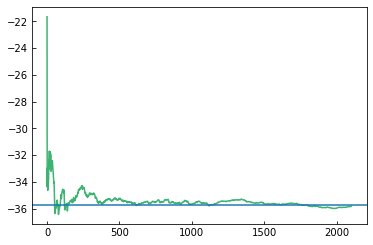

In [137]:
K_halfBeta = K[label][:,half_idx]
K_halfBeta_cumsum = np.cumsum(K_halfBeta)
for i in range(len(K_halfBeta)):
    K_halfBeta_cumsum[i] /= (i+1)
    
fig, ax4 = plt.subplots()
ax4.plot(K_halfBeta_cumsum,'-',color='mediumseagreen',label=r'$\beta=9.0$')
#ax4.axhline(-3.5311-0.438)
ax4.axhline(-35.715378606015335)
ax4.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')

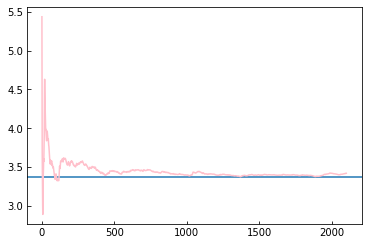

In [138]:
V_halfBeta = V[label][:,half_idx]
V_halfBeta_cumsum = np.cumsum(V_halfBeta)
for i in range(len(V_halfBeta)):
    V_halfBeta_cumsum[i] /= (i+1)
    
fig, ax5 = plt.subplots()
ax5.plot(V_halfBeta_cumsum,'-',color='pink',label=r'$\beta=9.0$',zorder=3)
#ax5.axhline(0.438)
ax5.axhline(3.3650282801015536)
ax5.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')

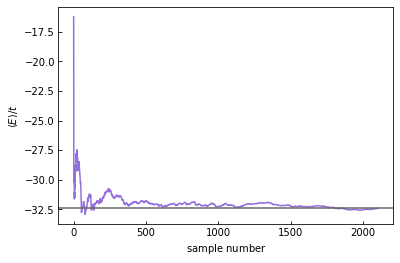

In [139]:
E_halfBeta = E[label][:,half_idx]
E_halfBeta_cumsum = np.cumsum(E_halfBeta)
for i in range(len(E_halfBeta)):
    E_halfBeta_cumsum[i] /= (i+1)
fig, ax6 = plt.subplots()
ax6.plot(E_halfBeta_cumsum,'-',color='mediumpurple',label=r'$\beta=9.0$')
ax6.set_ylabel(r'$\langle E \rangle / t$')
ax6.set_xlabel(r'$\rm{sample \ number}$')
#ax6.axhline(-3.531128874149274,color='#666666')

ax6.axhline(-32.35035032591378,color='#666666')

#ax6.set_ylim(-3.6,-2)
ax6.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
#plt.legend()
plt.savefig('E_running_avg_beta9.pdf')

### $\langle E(\tau/\beta=0.5) \rangle$ / t vs. $\beta$

KeyError: 'beta=2'

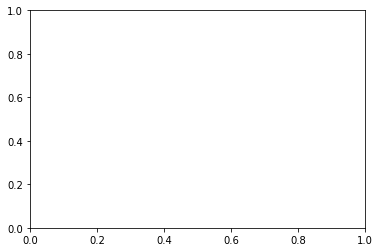

In [1462]:
# Plot total ground state energy as function of tau slices
fig, ax7 = plt.subplots()
plot_list = list(range(1,10,1))
 
E_center_mean = []
E_center_err = []
for i in plot_list:
    # Attach center data
    label = f'beta={i}'
    E_center_mean.append(E_mean[label][2])
    E_center_err.append(E_err[label][2])



ax7.plot(plot_list,E_center_mean,'-',label=label,color='lightskyblue')
ax7.errorbar(plot_list,E_center_mean,marker='o',mec='dodgerblue',
                            mfc='lightskyblue',mew=0.5,alpha=1,
                            yerr=E_center_err,fmt='o',
                            ecolor='dodgerblue',zorder=1,capsize=2,
                            ms=0,elinewidth=0.5)
ax7.axhline(-3.531128874149274,color='#666666')
ax7.set_ylabel(r'$\langle E \rangle /t$')
ax7.set_xlabel(r'$\beta$')
ax7.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
#plt.legend()
plt.savefig('energy_beta_dependence_1mill_points.pdf')

In [ ]:
# Mix the data files


In [4]:
!ls

3_9_1.0000_-3.9000_1.0000_2.0000_1000000_17_2D_canK.dat
3_9_1.0000_-3.9000_1.0000_2.0000_1000000_17_2D_canV.dat
3_9_1.0000_-3.9000_1.0000_2.0000_1000000_17_2D_gc_K.dat
3_9_1.0000_-3.9000_1.0000_2.0000_1000000_17_2D_gc_N.dat
3_9_1.0000_-3.9000_1.0000_2.0000_1000000_17_2D_gc_V.dat
3_9_1.0000_-4.0009_1.0000_2.0000_1000000_17_2D_canK.dat
3_9_1.0000_-4.0009_1.0000_2.0000_1000000_17_2D_canV.dat
3_9_1.0000_-4.2009_1.0000_2.0000_1000000_17_2D_canK.dat
3_9_1.0000_-4.2009_1.0000_2.0000_1000000_17_2D_canV.dat
3_9_1.0000_-4.2009_1.0000_2.0000_60000000_17_2D_canK.dat
3_9_1.0000_-4.2009_1.0000_2.0000_60000000_17_2D_canV.dat
Data
EnergyAtFixedInteraction
Entanglement
Figures
HigherDimensionTestData
NTargetDependenceMu
Notebooks
Notes
TauSliceComparison
__pycache__
main.py
output.prof
output_no_prealloc_insertion_sites_no_round.prof
output_no_prealloc_insertion_sites_with_round.prof
output_prealloc_insertion_sites.prof
output_prealloc_insertion_sites_no_round.prof
pimc.py
quick_beta_scaling.ipynb
tau_

In [84]:
!head 3_9_1.0000_-3.9000_1.0000_2.0000_1000000_17_2D_gc_N.dat